# Wine Quality

# 1) problem statement

  1. Goal of the Data

      The main objective of this dataset is to analyze and predict wine quality based on various physicochemical properties, such as acidity, sugar levels, sulfur dioxide, pH, and alcohol content.

  2. Description of Dataset

       The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
  3. About the Data
  
  The dataset you provided, Wine Quality, typically contains physicochemical properties of different wine samples along with their quality ratings





https://www.kaggle.com/datasets/rajyellow46/wine-quality

# 2) Libraries

In [2]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities
# ------------------------------
# Machine Learning Algorithms - Regression
# ------------------------------
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 3) Reading and understanding the data

In [8]:
data=pd.read_csv("winequalityN.csv")
data


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
#shape of the data
data.shape

(6497, 13)

In [11]:
#display first n rows
data=pd.read_csv("winequalityN.csv")
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [12]:
#display last n rows
data.tail(10)


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6487  red            6.6             0.725         0.20             7.8   
6488  red            6.3             0.550         0.15             1.8   
6489  red            5.4             0.740         0.09             1.7   
6490  red            6.3             0.510         0.13             2.3   
6491  red            6.8             0.620         0.08             1.9   
6492  red            6.2             0.600         0.08             2.0   
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6487      0.073                 29.0                  79.0  0.99770  3.29   
6488      0.077                 26.0                  35.0  0.99314  3.32   
6489      0.089                 16.0                  26.0  0.99402  3.67   
6490      0.076                 29.0                  40.0  0.99574  3.42   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
6487       0.54      9.2        5  
6488       0.82     11.6        6  
6489       0.56     11.6        6  
6490       0.75     11.0        6  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6

In [13]:
# display random dataset samples
data.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
3784  white            6.5             0.250         0.27            17.4   
5159    red            7.0             0.975         0.04             2.0   
5820    red            8.4             0.620         0.12             1.8   
6428    red            NaN             0.440         0.09             2.2   
82    white            7.1             0.340         0.20             6.1   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
3784      0.064                 29.0                 140.0  0.99776  3.20   
5159      0.087                 12.0                  67.0  0.99565  3.35   
5820      0.072                 38.0                  46.0  0.99504  3.38   
6428      0.063                  9.0                  18.0  0.99444   NaN   
82        0.063                 47.0                 164.0  0.99460  3.17   

      sulphates  alcohol  quality  
3784       0.49     10.1        6  
5159       0.60      9.4        4  
5820       0.89     11.8        6  
6428       0.69     11.3        6  
82         0.42     10.0        5

### summarized information of columns in dataset

In [14]:
#display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [15]:
#display summary statistics
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [16]:
data.describe(include=['O']).T

count unique    top  freq
type  6497      2  white  4898

# 4)Visualization of The Features

## type

In [17]:
data['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

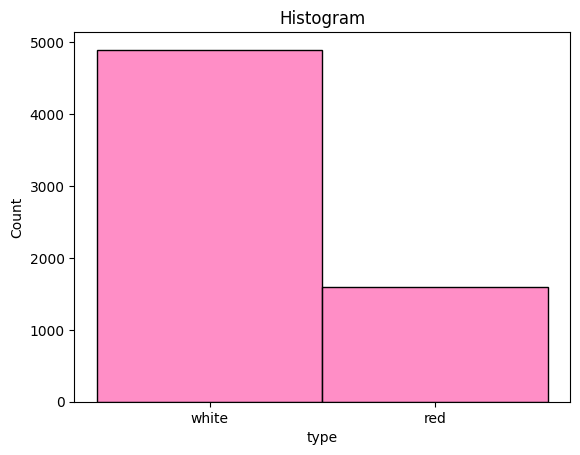

In [18]:
cp=sns.histplot(x=data['type'],color="hotpink",edgecolor="k")
plt.title("Histogram")
plt.xlabel("type")
plt.show()

**inference for type**

  the type of wine (either "white" or "red"). There are some missing values in the numeric columns.

##  fixed acidity   &  volatile acidity

In [19]:
data['fixed acidity'].value_counts()

fixed acidity
6.8     354
6.6     326
6.4     305
7.0     282
6.9     279
       ... 
13.8      1
14.0      1
14.3      1
15.9      1
12.1      1
Name: count, Length: 106, dtype: int64

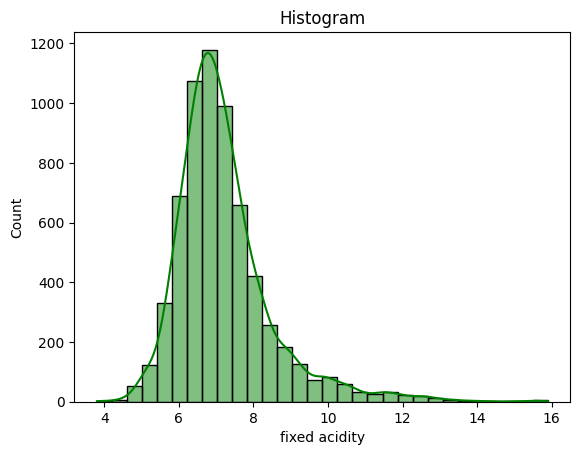

In [20]:
cp=sns.histplot(x=data['fixed acidity'],color="green",edgecolor="k", bins=30, kde=True)
plt.title("Histogram")
plt.xlabel("fixed acidity")
plt.show()

In [21]:
data['volatile acidity'].value_counts()

volatile acidity
0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
        ... 
1.115      1
1.580      1
0.955      1
1.180      1
0.895      1
Name: count, Length: 187, dtype: int64

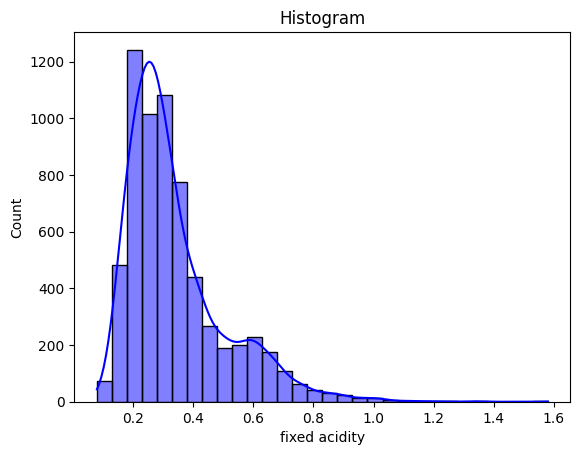

In [22]:
cp=sns.histplot(x=data['volatile acidity'],color="blue",edgecolor="k", bins=30, kde=True)
plt.title("Histogram")
plt.xlabel("fixed acidity")
plt.show()

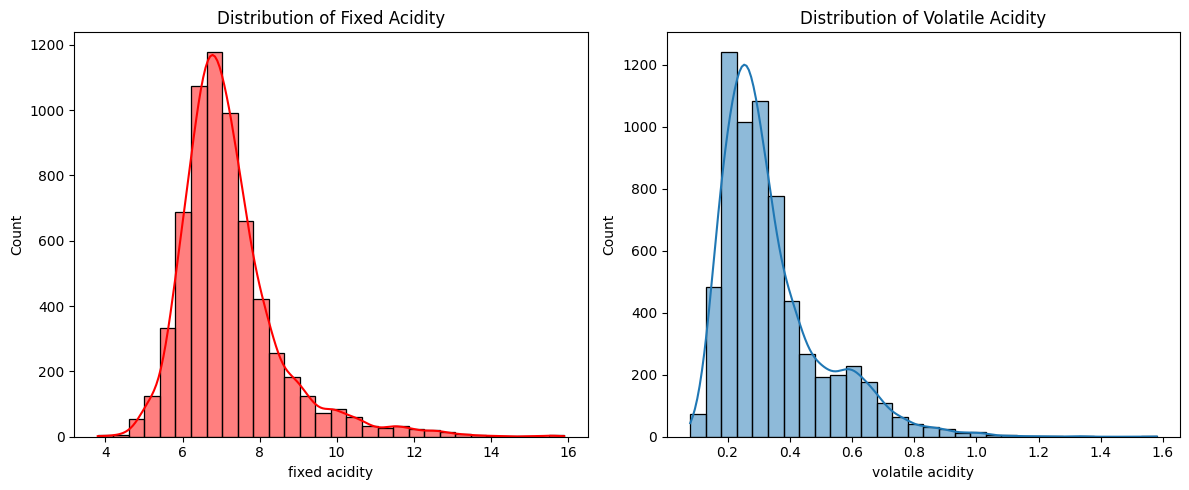

In [23]:
# Plot histograms
plt.figure(figsize=(12, 5))

# Fixed Acidity Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['fixed acidity'].dropna(), bins=30, kde=True,color="red")
plt.title("Distribution of Fixed Acidity")

# Volatile Acidity Histogram
plt.subplot(1, 2, 2)
sns.histplot(data['volatile acidity'].dropna(), bins=30, kde=True)
plt.title("Distribution of Volatile Acidity")

plt.tight_layout()
plt.show()

Inference:

Fixed Acidity: The histogram will show how fixed acidity is distributed. A normal or skewed distribution may indicate how acidity levels vary across wines.

Volatile Acidity: This histogram will highlight how much volatile acidity fluctuates, which can influence wine quality (higher values often lead to poor taste).

KDE Curve: The smooth density curve helps visualize the data spread.

## citric acid  

In [24]:
data['citric acid'].value_counts()

citric acid
0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
1.66      1
0.99      1
1.23      1
0.86      1
0.75      1
Name: count, Length: 89, dtype: int64

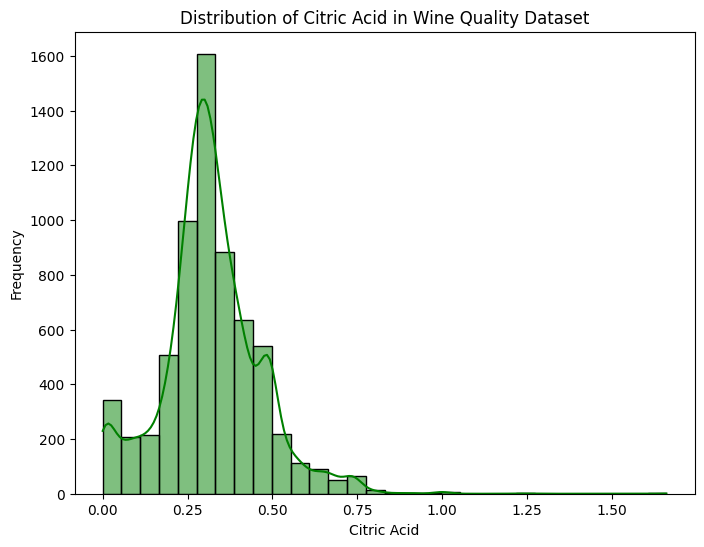

In [25]:
# Plot citric acid distribution using histplot
plt.figure(figsize=(8, 6))
sns.histplot(data['citric acid'], bins=30, kde=True, color='green')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.title('Distribution of Citric Acid in Wine Quality Dataset')
plt.show()


Inference:

* The histogram shows the frequency distribution of citric acid levels in the dataset.

* Since kde=False, the plot only represents the raw frequency without a smoothed density curve.

* If the distribution is skewed, it may suggest an imbalance in citric acid concentration across different wines.

* Peaks in the histogram indicate common citric acid values, while sparse regions may suggest less frequent occurrences.

## residual sugar  

In [26]:
data['residual sugar'].value_counts()

residual sugar
2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
18.40      1
3.65       1
2.95       1
2.55       1
3.45       1
Name: count, Length: 316, dtype: int64

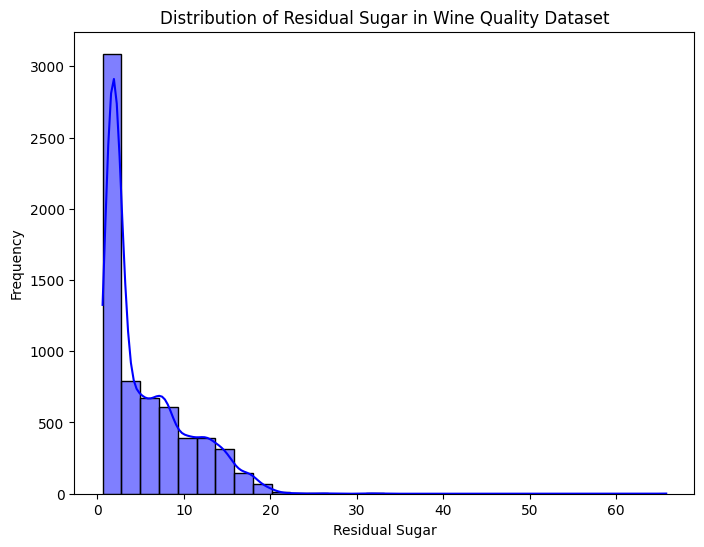

In [27]:
# Plot residual sugar distribution using histplot
plt.figure(figsize=(8, 6))
sns.histplot(data['residual sugar'], bins=30, kde=True, color='blue')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.title('Distribution of Residual Sugar in Wine Quality Dataset')
plt.show()


Inference:

* The histogram visualizes the distribution of residual sugar in the dataset.

* The kde=True parameter overlays a kernel density estimation curve, helping to understand the shape of the distribution.

* If the distribution is skewed, it may indicate wines with significantly higher or lower sugar content.

* Residual sugar levels affect the taste profile of the wine, influencing its sweetness and fermentation characteristics.

## chlorides

In [28]:
data['chlorides'].value_counts()

chlorides
0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.369      1
0.153      1
0.267      1
0.235      1
0.230      1
Name: count, Length: 214, dtype: int64

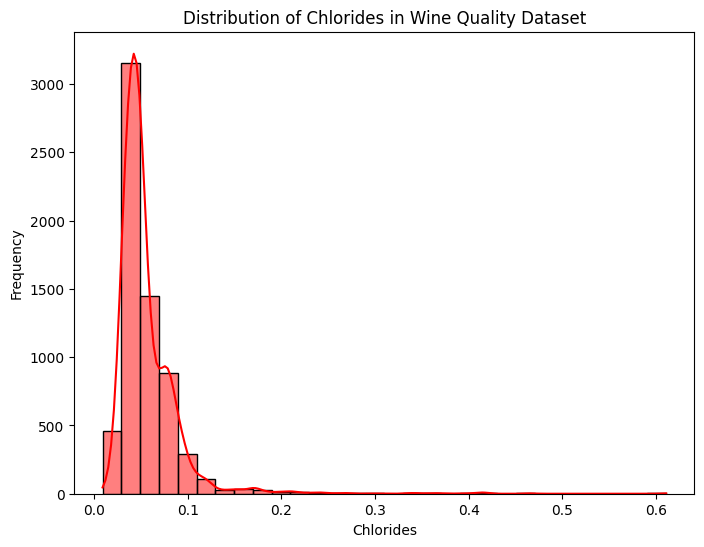

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data['chlorides'], bins=30, kde=True, color='red')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.title('Distribution of Chlorides in Wine Quality Dataset')
plt.show()


Inference:

* The histogram visualizes the distribution of chloride concentration in the dataset.

* Chlorides represent the salt content, which affects wine taste and preservation.

* If the distribution is right-skewed, it suggests that most wines have low chloride levels, with a few higher values as outliers.

* A high chloride concentration may indicate poor wine quality due to excessive saltiness.

## free sulfur dioxide & total sulfur dioxide

In [30]:
data['free sulfur dioxide'].value_counts()

free sulfur dioxide
29.0     183
6.0      170
26.0     161
15.0     157
24.0     152
        ... 
28.5       1
289.0      1
43.5       1
97.0       1
5.5        1
Name: count, Length: 135, dtype: int64

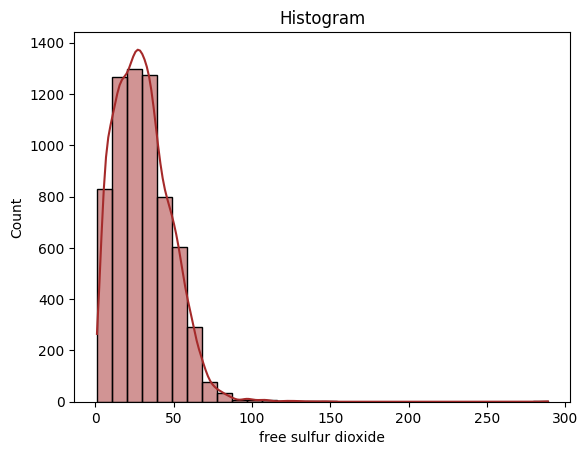

In [31]:
cp=sns.histplot(x=data['free sulfur dioxide'],color="brown",edgecolor="k",bins=30,kde=True)
plt.title("Histogram")
plt.xlabel("free sulfur dioxide")
plt.show()

In [32]:
data['total sulfur dioxide'].value_counts()

total sulfur dioxide
111.0    72
113.0    65
122.0    57
117.0    57
124.0    56
         ..
115.5     1
440.0     1
164.5     1
278.0     1
289.0     1
Name: count, Length: 276, dtype: int64

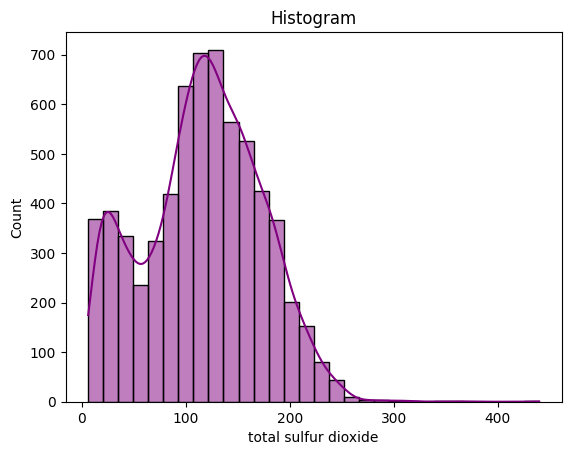

In [33]:
cp=sns.histplot(x=data['total sulfur dioxide'],color="purple",edgecolor="k",bins=30,kde=True)
plt.title("Histogram")
plt.xlabel("total sulfur dioxide")
plt.show()

Inference:

1. Free Sulfur Dioxide:

   The histogram will show the spread of free sulfur dioxide values.

   If the distribution is right-skewed, it means a few wines have very high levels of free sulfur dioxide.

  If it’s more normal, most wines have similar levels.

2. Total Sulfur Dioxide:

 Similar analysis applies; total sulfur dioxide usually has a wider range.

 Comparing both histograms can show if total sulfur dioxide is significantly higher, which is expected since it includes both free and bound sulfur dioxide.

##  density

In [34]:
data['density'].value_counts()

density
0.99720    69
0.99760    69
0.99800    64
0.99200    64
0.99280    63
           ..
0.99717     1
0.99501     1
0.99765     1
0.99483     1
0.99651     1
Name: count, Length: 998, dtype: int64

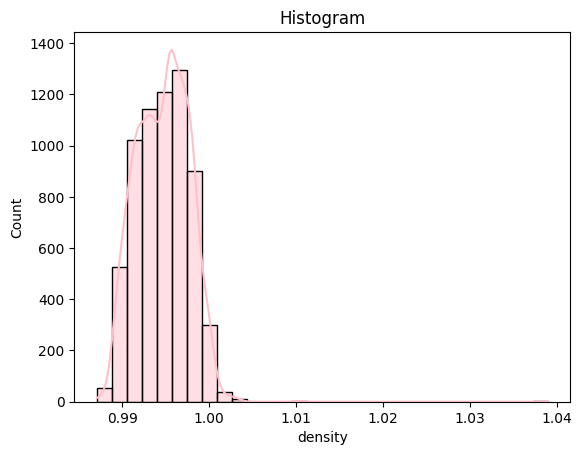

In [35]:
cp=sns.histplot(x=data['density'],color="pink",edgecolor="k",bins=30,kde=True)
plt.title("Histogram")
plt.xlabel("density")
plt.show()

inference:

* The histogram visualizes the density distribution in the dataset.

* The kde=True parameter overlays a kernel density estimation curve, showing the shape of the distribution.

* If the plot is skewed, it might indicate an imbalance in density values.

* The spread and central tendency of density values can provide insights into the wine's characteristics.

* Would you like to add any additional analysis, such as checking for outliers or comparing density across wine types?


## pH & sulphates                     

In [36]:
data['pH'].value_counts()

pH
3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
       ... 
2.77      1
2.84      1
3.79      1
2.82      1
3.85      1
Name: count, Length: 108, dtype: int64

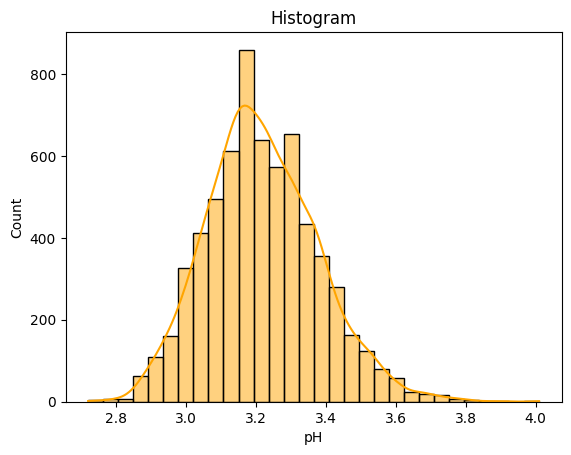

In [37]:
cp=sns.histplot(x=data['pH'],color="orange",edgecolor="k",bins=30,kde=True)
plt.title("Histogram")
plt.xlabel("pH")
plt.show()

In [38]:
data['sulphates'].value_counts()

sulphates
0.50    275
0.46    243
0.54    234
0.44    232
0.38    214
       ... 
1.62      1
1.34      1
1.16      1
1.15      1
1.33      1
Name: count, Length: 111, dtype: int64

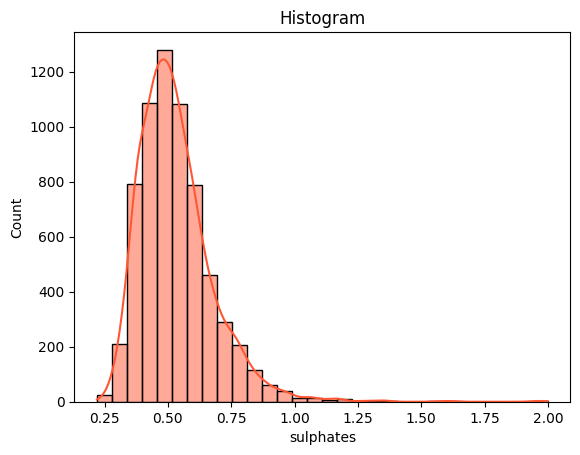

In [39]:
cp=sns.histplot(x=data['sulphates'],color='#FF5733',edgecolor="k",bins=30,kde=True)
plt.title("Histogram")
plt.xlabel("sulphates")
plt.show()

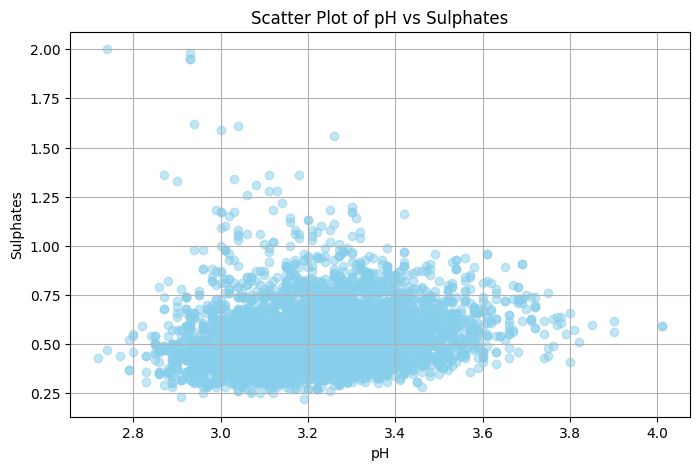


Correlation between pH and Sulphates:
                 pH  sulphates
pH         1.000000   0.191248
sulphates  0.191248   1.000000


In [40]:
plt.figure(figsize=(8, 5))
plt.scatter(data['pH'], data['sulphates'], alpha=0.5, color='skyblue')
plt.xlabel("pH")
plt.ylabel("Sulphates")
plt.title("Scatter Plot of pH vs Sulphates")
plt.grid()
plt.show()

# Calculate correlation
correlation = data[['pH', 'sulphates']].corr()
print("\nCorrelation between pH and Sulphates:")
print(correlation)


Inference:

1. Dataset Overview:

The dataset contains 6497 entries with 13 columns related to wine properties.

The pH and sulphates columns have a few missing values (pH: 9 missing, sulphates: 4 missing).

2. Correlation:

The correlation between pH and sulphates is 0.191, indicating a weak positive relationship. This means that as sulphates increase, pH tends to increase slightly, but the relationship is not strong.

3. Visualization Insights:

The scatter plot shows a spread of values without a clear trend, further supporting the weak correlation.

##  alcohol & quality

In [41]:
data['alcohol'].value_counts()

alcohol
9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 111, dtype: int64

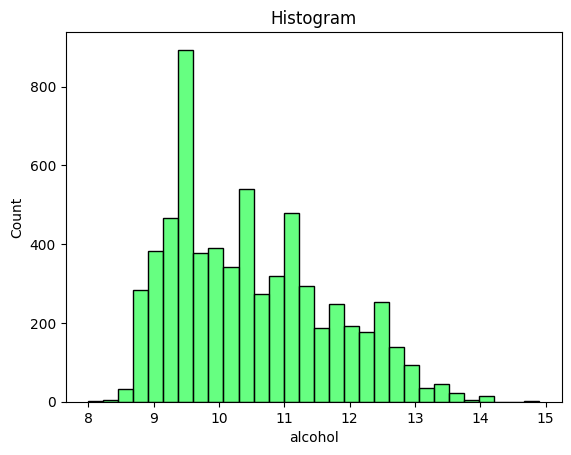

In [42]:
cp=sns.histplot(x=data['alcohol'],color='#33FF57',edgecolor="k",bins=30)
plt.title("Histogram")
plt.xlabel("alcohol")
plt.show()

In [43]:
data['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

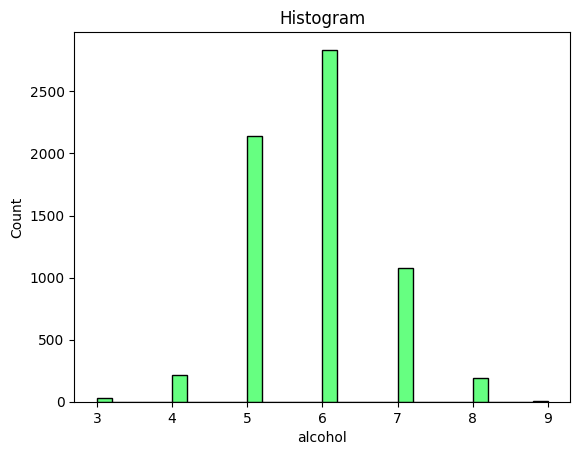

In [44]:
cp=sns.histplot(x=data['quality'],color='#33FF57',edgecolor="k",bins=30)
plt.title("Histogram")
plt.xlabel("alcohol")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11876\1232800952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["quality"], y=data["alcohol"], palette="coolwarm")


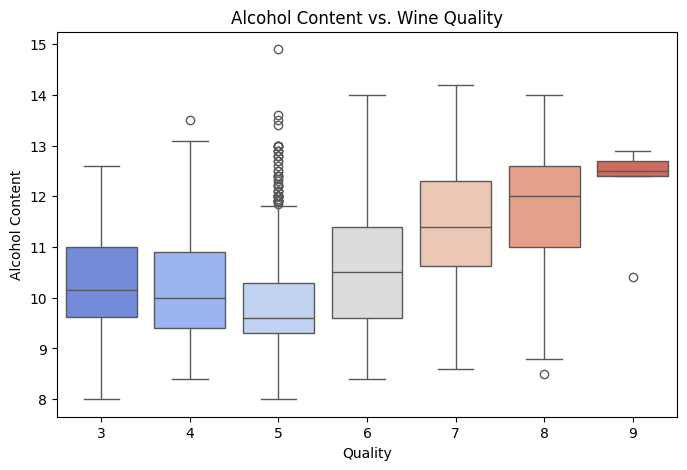

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["quality"], y=data["alcohol"], palette="coolwarm")
plt.xlabel("Quality")
plt.ylabel("Alcohol Content")
plt.title("Alcohol Content vs. Wine Quality")
plt.show()

Inference:

* The box plot shows that higher-quality wines tend to have higher alcohol content.

*  Lower-quality wines (scores 3-5) generally have lower alcohol levels,  
 whereas higher-quality wines (scores 7-9) have higher alcohol levels.

* This suggests a positive correlation between alcohol content and wine quality.

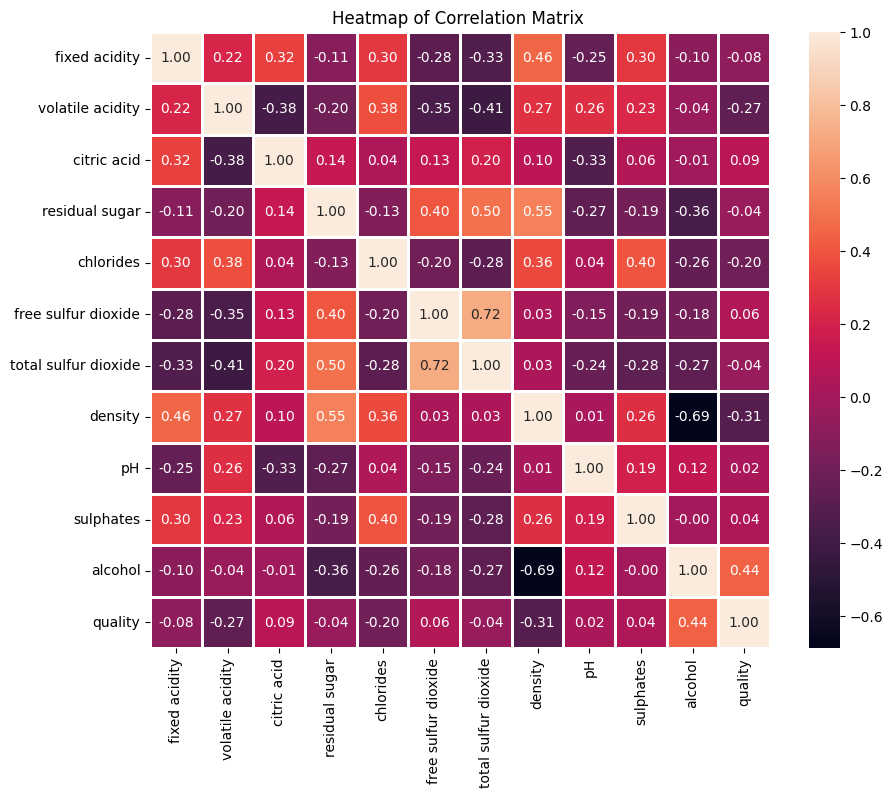

In [46]:
numeric_data=data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
correlation_matrix=numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='rocket',fmt='.2f',linewidths=2)
plt.title('Heatmap of Correlation Matrix ')
plt.show()

Inference from the Heatmap:

1.Positive Correlations:

 * Alcohol and Quality (0.44): Higher alcohol content is strongly  
  associated with better wine quality.

 * Density and Fixed Acidity (0.46): Denser wines tend to have higher
  acidity.

 * Residual Sugar and Density (0.55): More sugar leads to a denser wine.

 * Free Sulfur Dioxide and Total Sulfur Dioxide (0.72): These are
  closely related as free SO₂ contributes to total SO₂.

2.Negative Correlations:

* Density and Alcohol (-0.69): Wines with higher alcohol content tend
  to be less dense.

* Volatile Acidity and Quality (-0.27): Higher volatile acidity is
 linked to lower wine quality.

* Chlorides and Quality (-0.20): More chlorides (salts) tend to
 negatively impact quality.

* Density and Quality (-0.31): Denser wines are generally of lower
 quality.

3. Weak Correlations with Quality:

* Attributes like citric acid (0.08), pH (0.02), and sulphates (0.04) have little impact on quality.

<Figure size 1200x900 with 0 Axes>

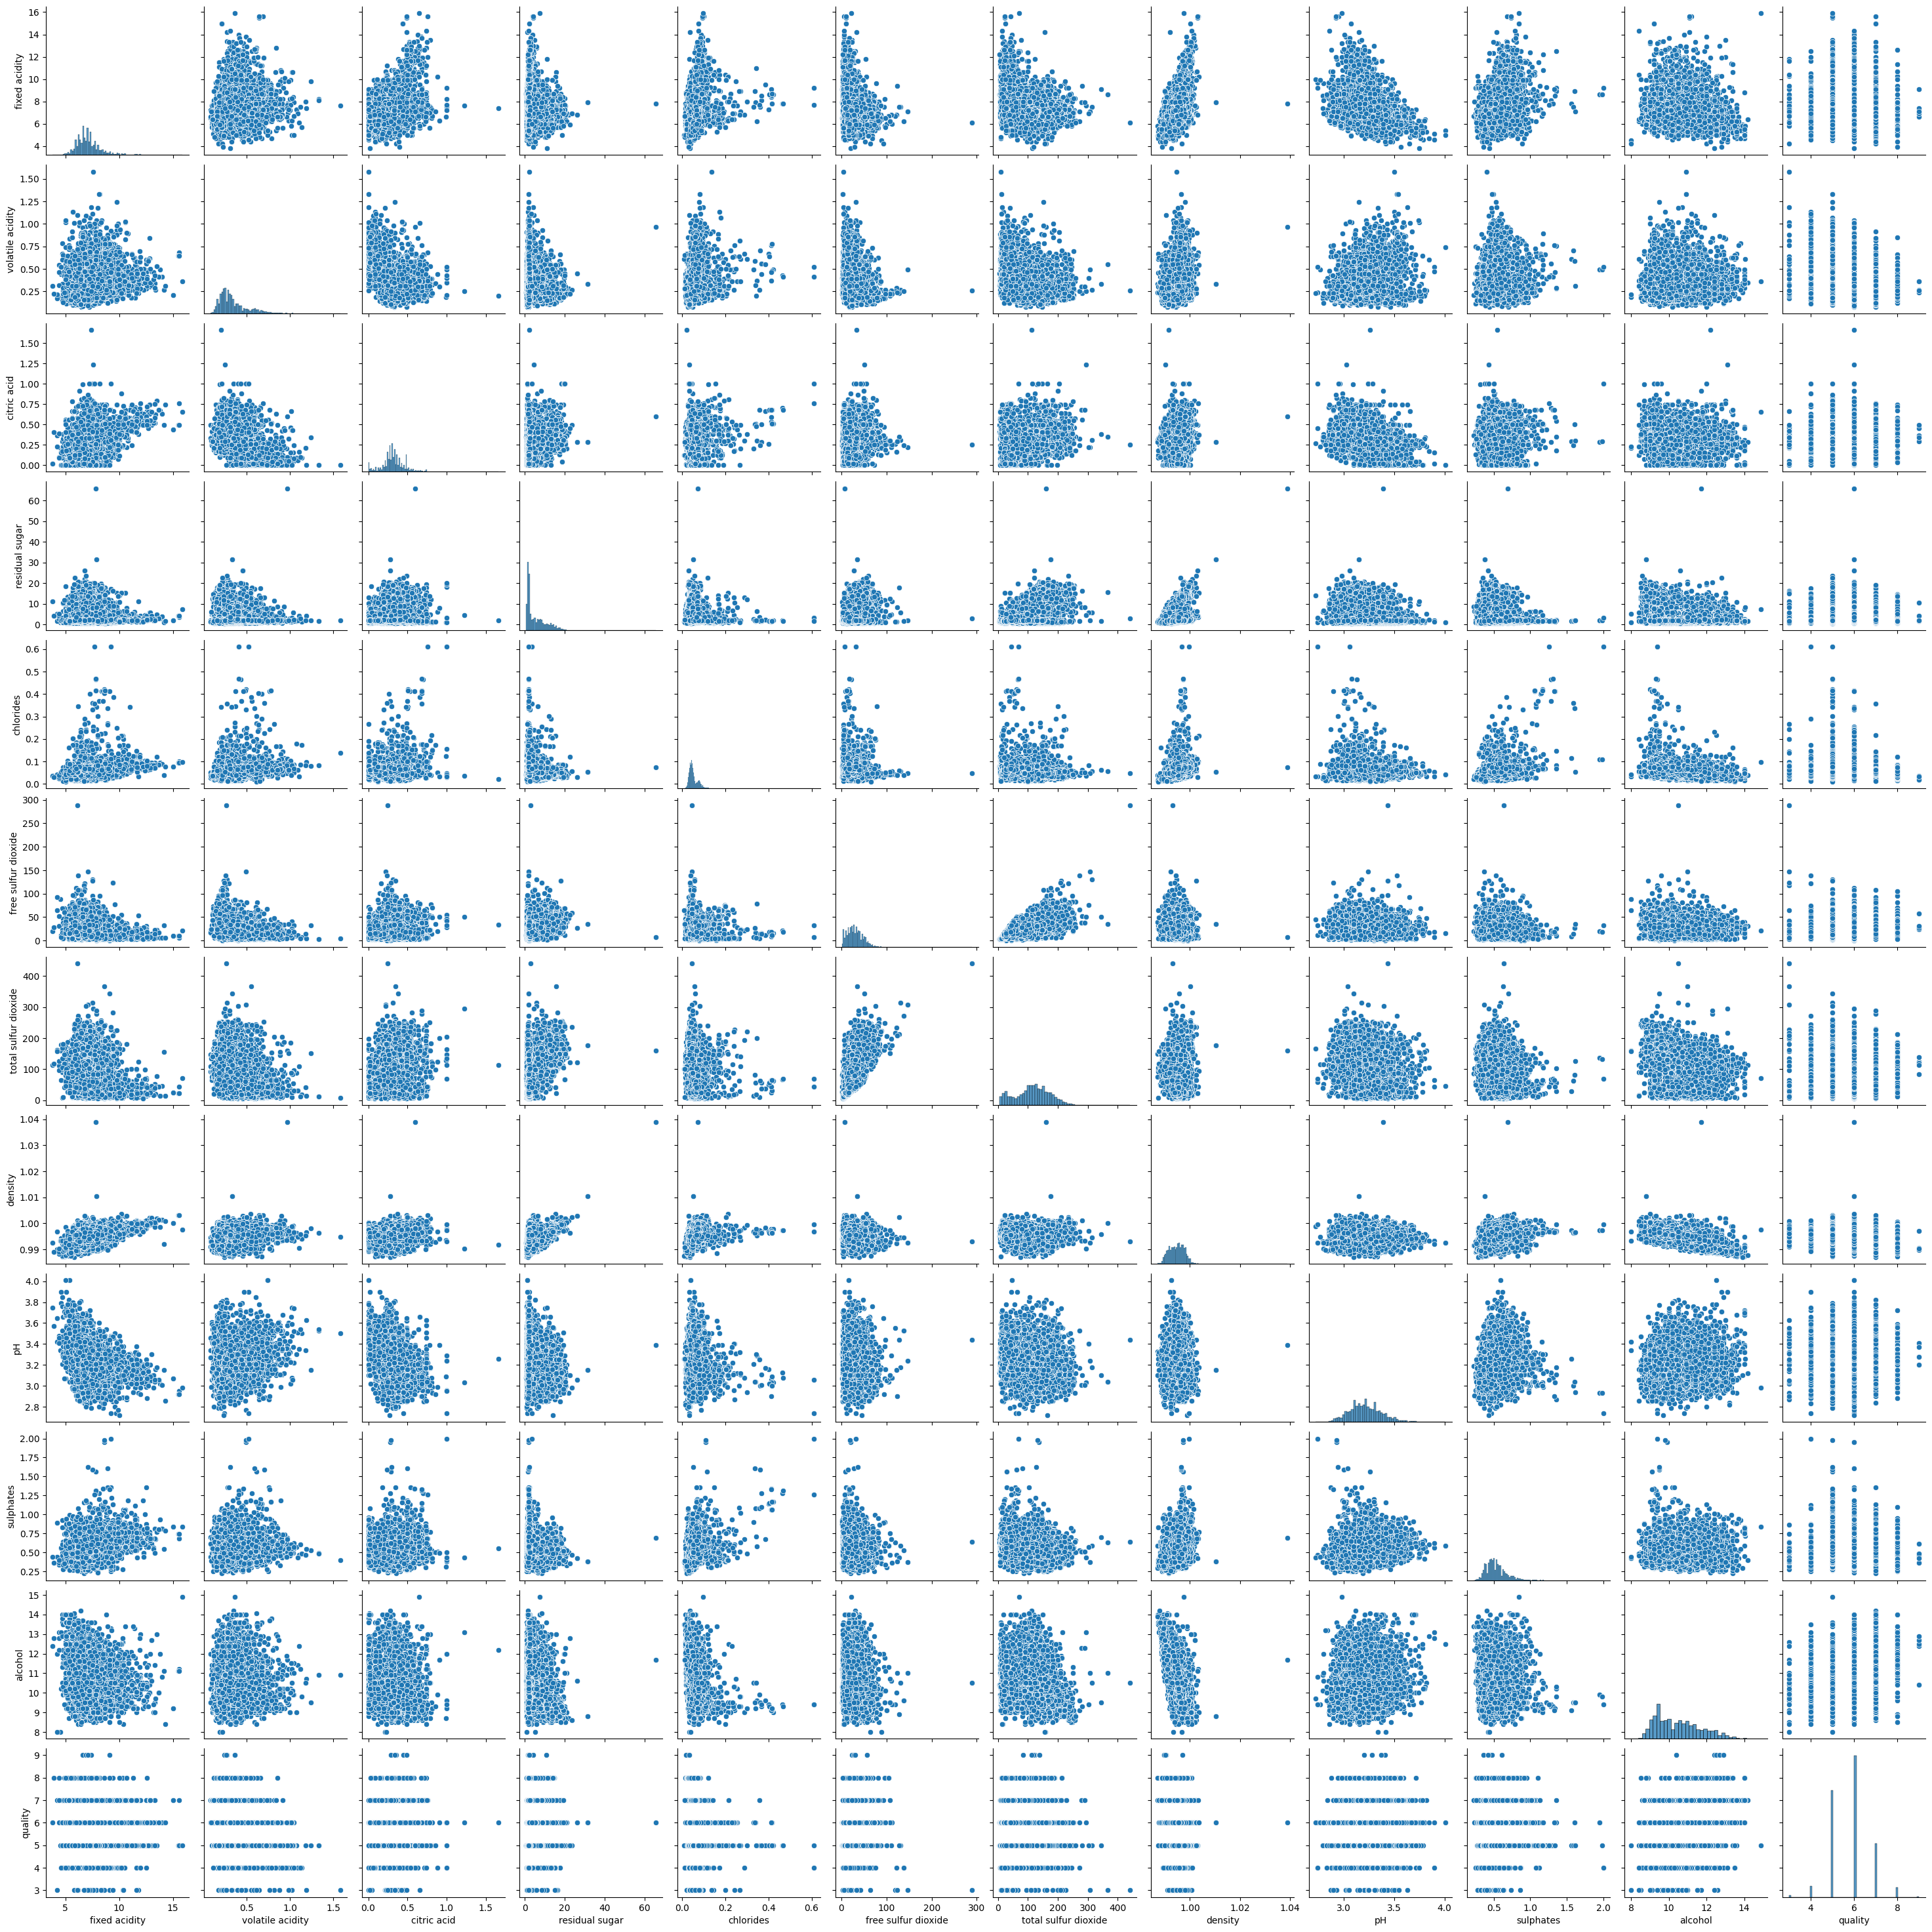

In [47]:
plt.figure(figsize=(12,9))
cp=sns.pairplot(data,diag_kind="hist")
plt.show()

 **Inference from Pair Plot**

   The pair plot provides insights into the relationships between different numerical features in the dataset. Here are the key observations:

1.Correlation Between Features

* Some variables show a strong positive or negative correlation. For example, alcohol vs. quality suggests that higher alcohol content might contribute to better wine quality.

* Density and residual sugar are also positively correlated, indicating that wines with higher sugar content tend to have higher density.

2.Feature Distributions

* The diagonal histograms show the distribution of each feature. Some
 features, like residual sugar and alcohol, appear skewed, meaning they are not normally distributed.

* Features like volatile acidity and citric acid show peaks at specific
 values, indicating that certain values are more frequent in the dataset.

3.Potential Outliers

* Some scatter plots display isolated points far from the main cluster, which could be potential outliers. For example, volatile acidity vs. quality has some extreme values.

* Checking for outliers and handling them appropriately could improve
 model performance if using this dataset for machine learning.

3.Clusters in Data

* Certain feature pairs, such as fixed acidity vs. citric acid, show
 distinct groupings, which could indicate different wine categories (e.g., red vs. white wine).

## Categorical data analysis

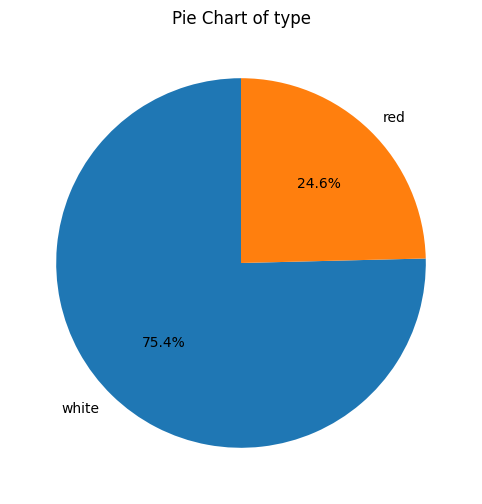

In [48]:
value_counts = data['type'].value_counts()
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(x=value_counts, labels=['white','red'], autopct='%1.1f%%', startangle=90)  # Use value_counts.index for labels
plt.title(f'Pie Chart of type')
plt.show()

# Data Cleaning

## handling duplicated

In [49]:
# delecting duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494     True
6495    False
6496    False
Length: 6497, dtype: bool

In [50]:
data.drop_duplicates(inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   object 
 1   fixed acidity         5319 non-null   float64
 2   volatile acidity      5321 non-null   float64
 3   citric acid           5326 non-null   float64
 4   residual sugar        5327 non-null   float64
 5   chlorides             5327 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5325 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 582.9+ KB


## handling missing values

In [52]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [53]:
data.isna().sum()[data.isna().sum()!=0]

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64

In [54]:
(data.isna().sum()/data.shape[0]*100).round (2)

type                    0.00
fixed acidity           0.19
volatile acidity        0.15
citric acid             0.06
residual sugar          0.04
chlorides               0.04
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
pH                      0.17
sulphates               0.08
alcohol                 0.00
quality                 0.00
dtype: float64

In [55]:
#data['type'].fillna(data['type'].mode()[0],inplace=True)        #no need

In [56]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [57]:
data['fixed acidity'].fillna(data['fixed acidity'].median(),inplace=True)
data['volatile acidity'].fillna(data['volatile acidity'].median(),inplace=True)        #have skeweness. so fill with median
data['citric acid'].fillna(data['citric acid'].mean(),inplace=True)
data['residual sugar'].fillna(data['residual sugar'].median(),inplace=True)
data['chlorides'].fillna(data['chlorides'].median(),inplace=True)
data['pH'].fillna(data['pH'].mean(),inplace=True)
data['sulphates'].fillna(data['sulphates'].median(),inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_11876\1684090763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fixed acidity'].fillna(data['fixed acidity'].median(),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11876\1684090763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [58]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## converting categorical variables to Numerical

In [59]:
# columns of object type
cats_cols=data.columns[data.dtypes=="object"]
cats_cols


Index(['type'], dtype='object')

### Ordinal encoding

In [60]:
data["type"].value_counts()

type
white    3970
red      1359
Name: count, dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   object 
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 582.9+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_11876\2231941076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type',y='quality',data=data,palette="rainbow")


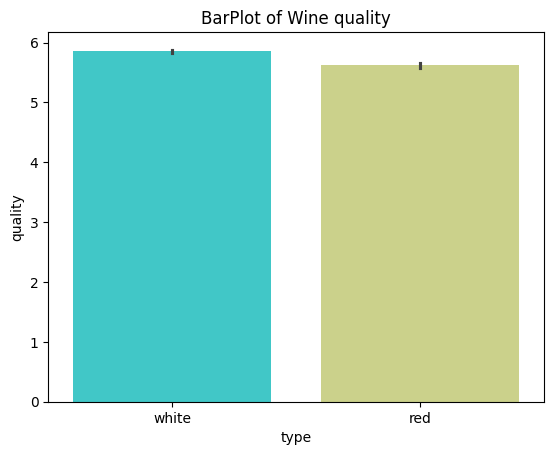

In [62]:
# bar --- x-type      y-quality
sns.barplot(x='type',y='quality',data=data,palette="rainbow")
plt.title('BarPlot of Wine quality')
plt.show()

In [63]:
data["type"]=data['type'].map({'white':0,'red':1})

# Data Transformation

## scaling

### standardization

In [64]:
# create a copy of the original data for  comparison
data_scaled_df=data.copy()

# select numeric columns, excluding 'quality'
numeric_columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides','total sulfur dioxide', 'density']


# initialize the standardscaler
scaler=StandardScaler()

# Apply the scaler only to the numeric columns
data_scaled_df[numeric_columns]=scaler.fit_transform(data[numeric_columns])
data_scaled_df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0 -0.585079      -0.164028         -0.440567     0.280575            20.7   
1 -0.585079      -0.695190         -0.262096     0.144578             1.6   
2 -0.585079       0.670656         -0.381077     0.552571             6.9   
3 -0.585079      -0.012267         -0.678528     0.008580             8.5   
6 -0.585079      -0.771070         -0.143116    -1.079403             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide   density    pH  \
0  -0.316677                 45.0              0.982996  2.179883  3.00   
1  -0.208083                 14.0              0.313700 -0.180714  3.30   
2  -0.180935                 30.0             -0.302757  0.190237  3.26   
3   0.036252                 47.0              1.264804  0.358851  3.19   
6  -0.316677                 30.0              0.384152  0.122791  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
6       0.47      9.6        6

## skeweness

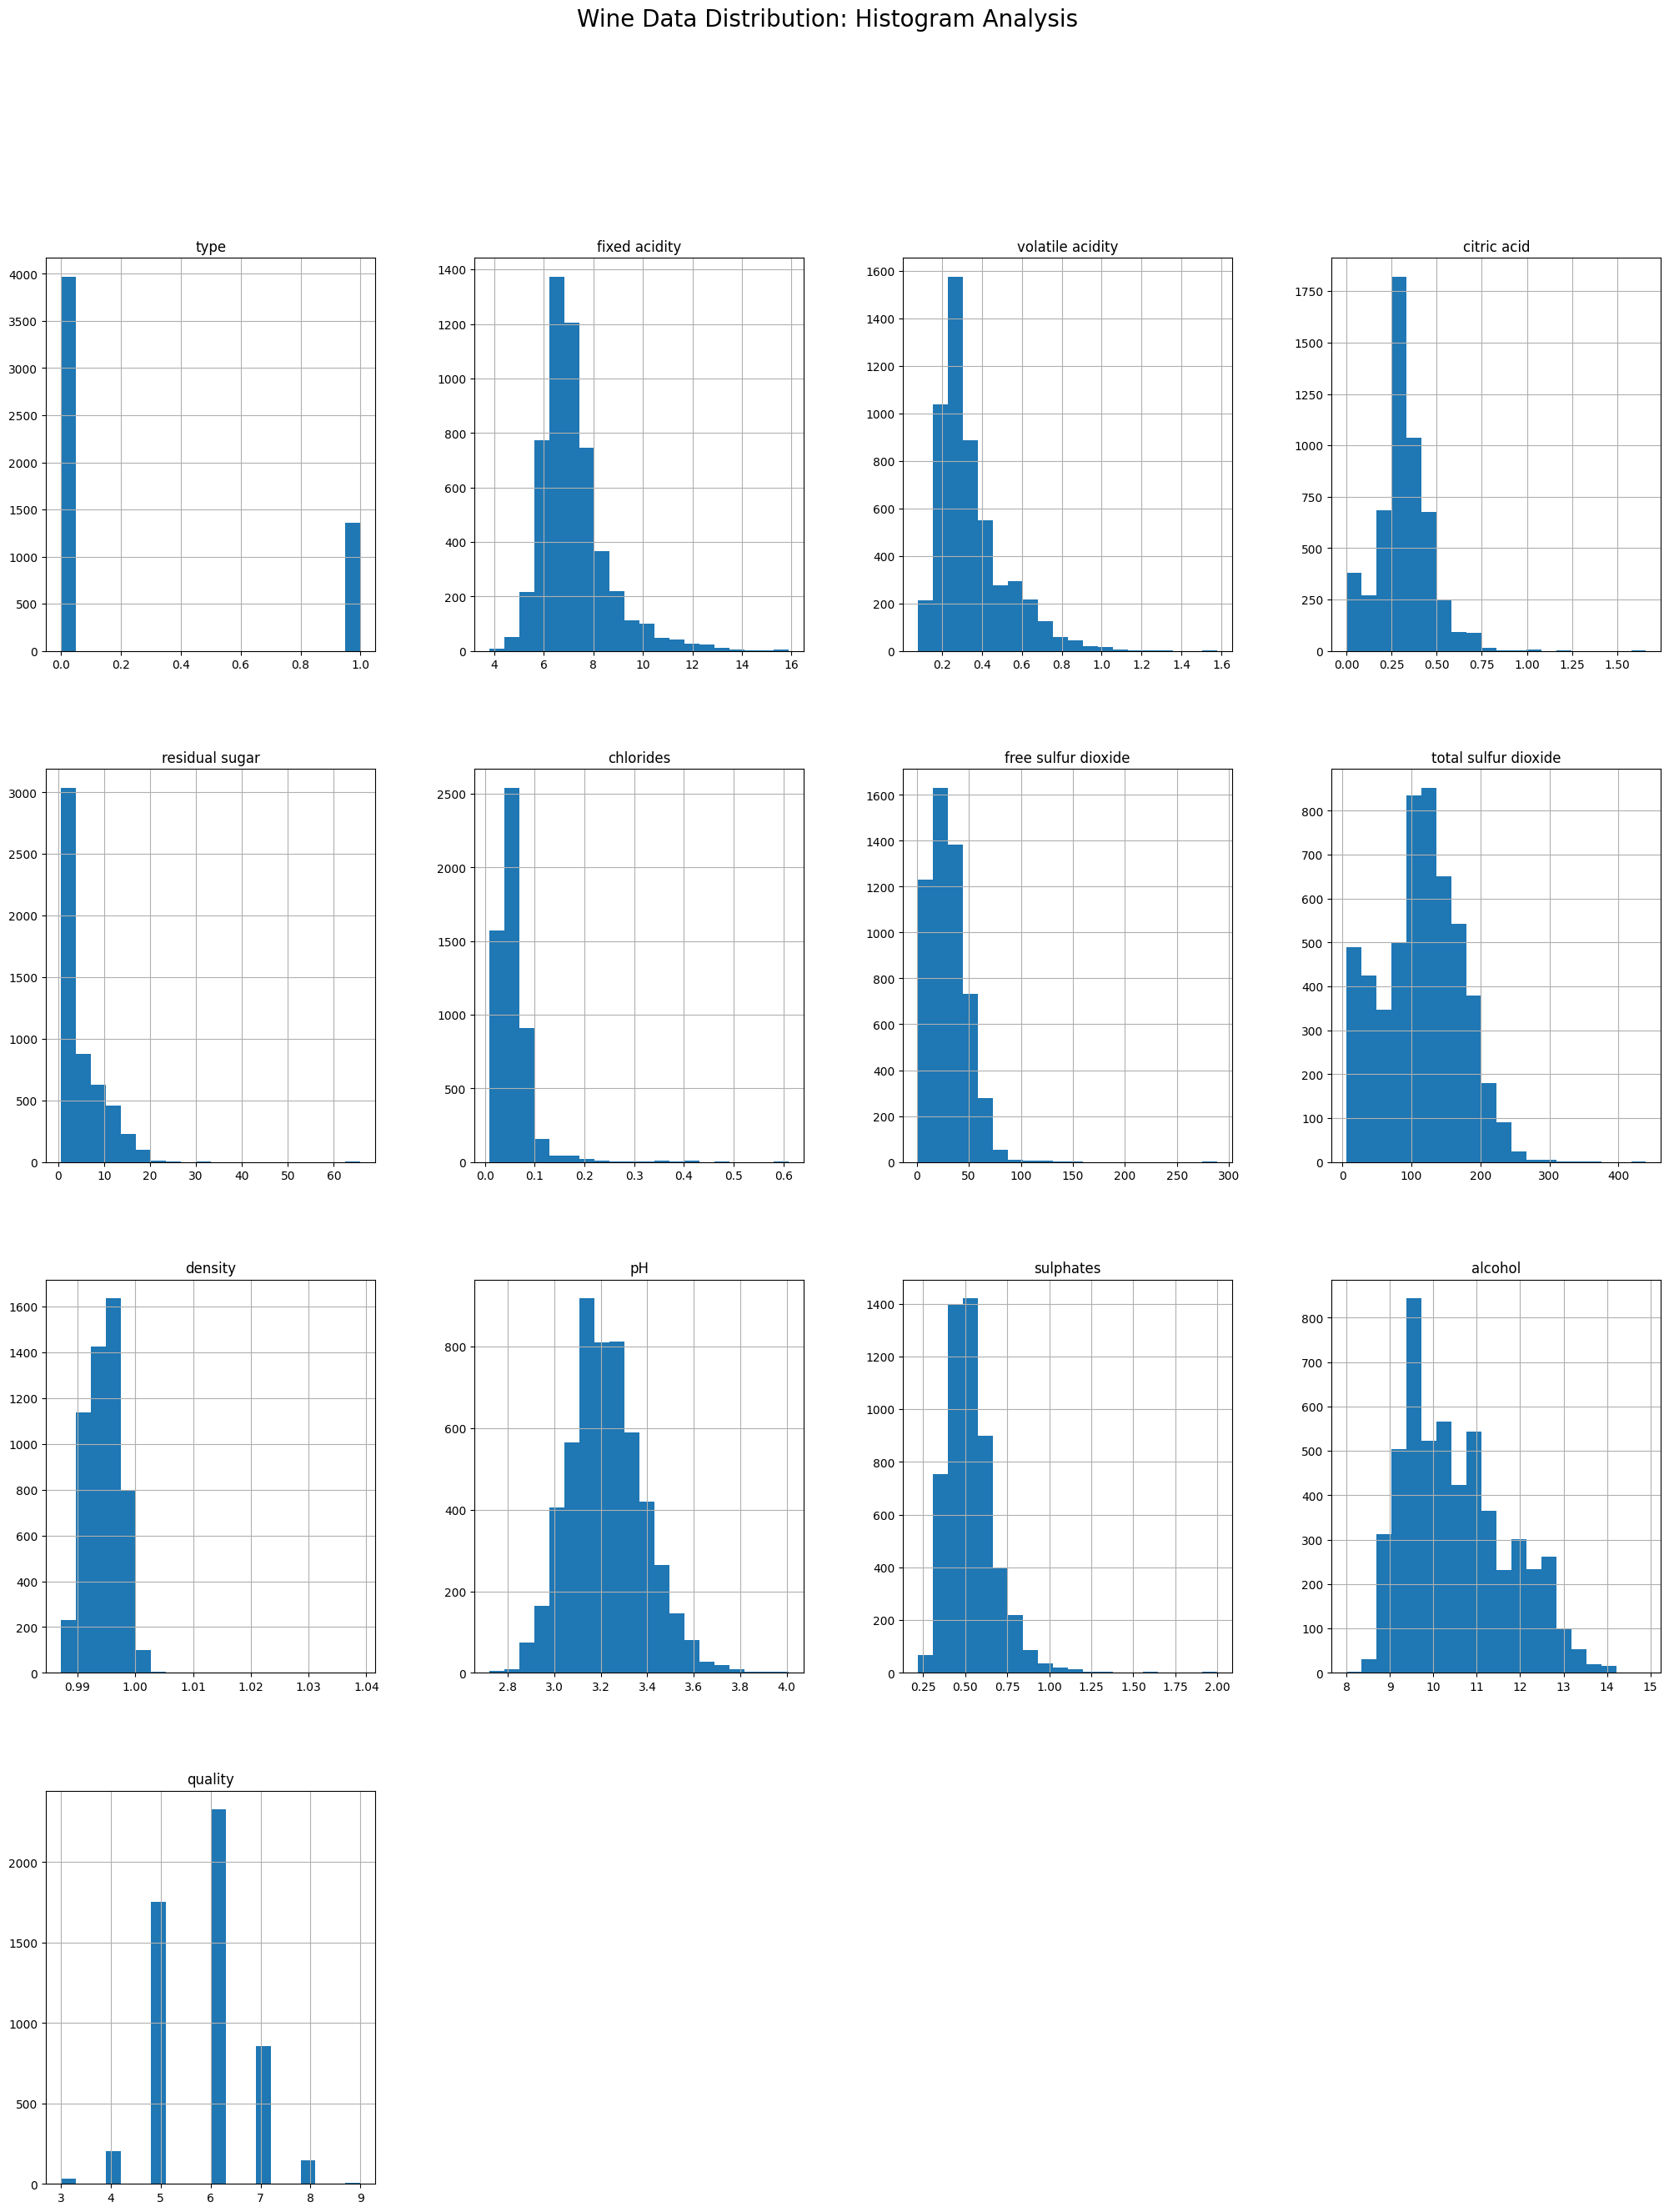

In [65]:
data.hist(bins=20,figsize=(25,30))
plt.suptitle('Wine Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

###handle skeweness

In [66]:
# calculate skewness for each column
skewness=data.skew()
# sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)
# display the sorted skewness values
print(sorted_skewness)

total sulfur dioxide    0.061697
quality                 0.148992
pH                      0.391546
citric acid             0.484522
alcohol                 0.546145
density                 0.664751
type                    1.124409
free sulfur dioxide     1.358640
volatile acidity        1.507105
fixed acidity           1.652781
residual sugar          1.703327
sulphates               1.810185
chlorides               5.342049
dtype: float64


In [67]:
# step 1: select numeric columns ,excluding "quality"
numeric_columns=data.drop(columns=['quality']).select_dtypes(include=['number'])

#step 2: calculate skewness for numeric columns
skewness=numeric_columns.skew()

#step3: identify columns with high skewness (threshold > 1 or < -1)
highly_skewned_columns=skewness[abs(skewness)>1].index

#step 4 : Apply log transformation using np.1p() for columns with high skewness
for col in highly_skewned_columns:
  #create a new columns with log-transformed values
  data[col]=np.log1p(data[col])
# check transformed columns
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0.0       2.079442          0.239017         0.36        3.077312   
1   0.0       1.987874          0.262364         0.34        0.955511   
2   0.0       2.208274          0.246860         0.40        2.066863   
3   0.0       2.104134          0.207014         0.32        2.251292   
6   0.0       1.974081          0.277632         0.16        2.079442   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0   0.044017             3.828641                 170.0   1.0010  3.00   
1   0.047837             2.708050                 132.0   0.9940  3.30   
2   0.048790             3.433987                  97.0   0.9951  3.26   
3   0.056380             3.871201                 186.0   0.9956  3.19   
6   0.044017             3.433987                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0   0.371564      8.8        6  
1   0.398776      9.5        6  
2   0.364643     10.1        6  
3   0.336472      9.9        6  
6   0.385262      9.6        6

In [68]:
highly_skewned_columns

Index(['type', 'fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'sulphates'],
      dtype='object')

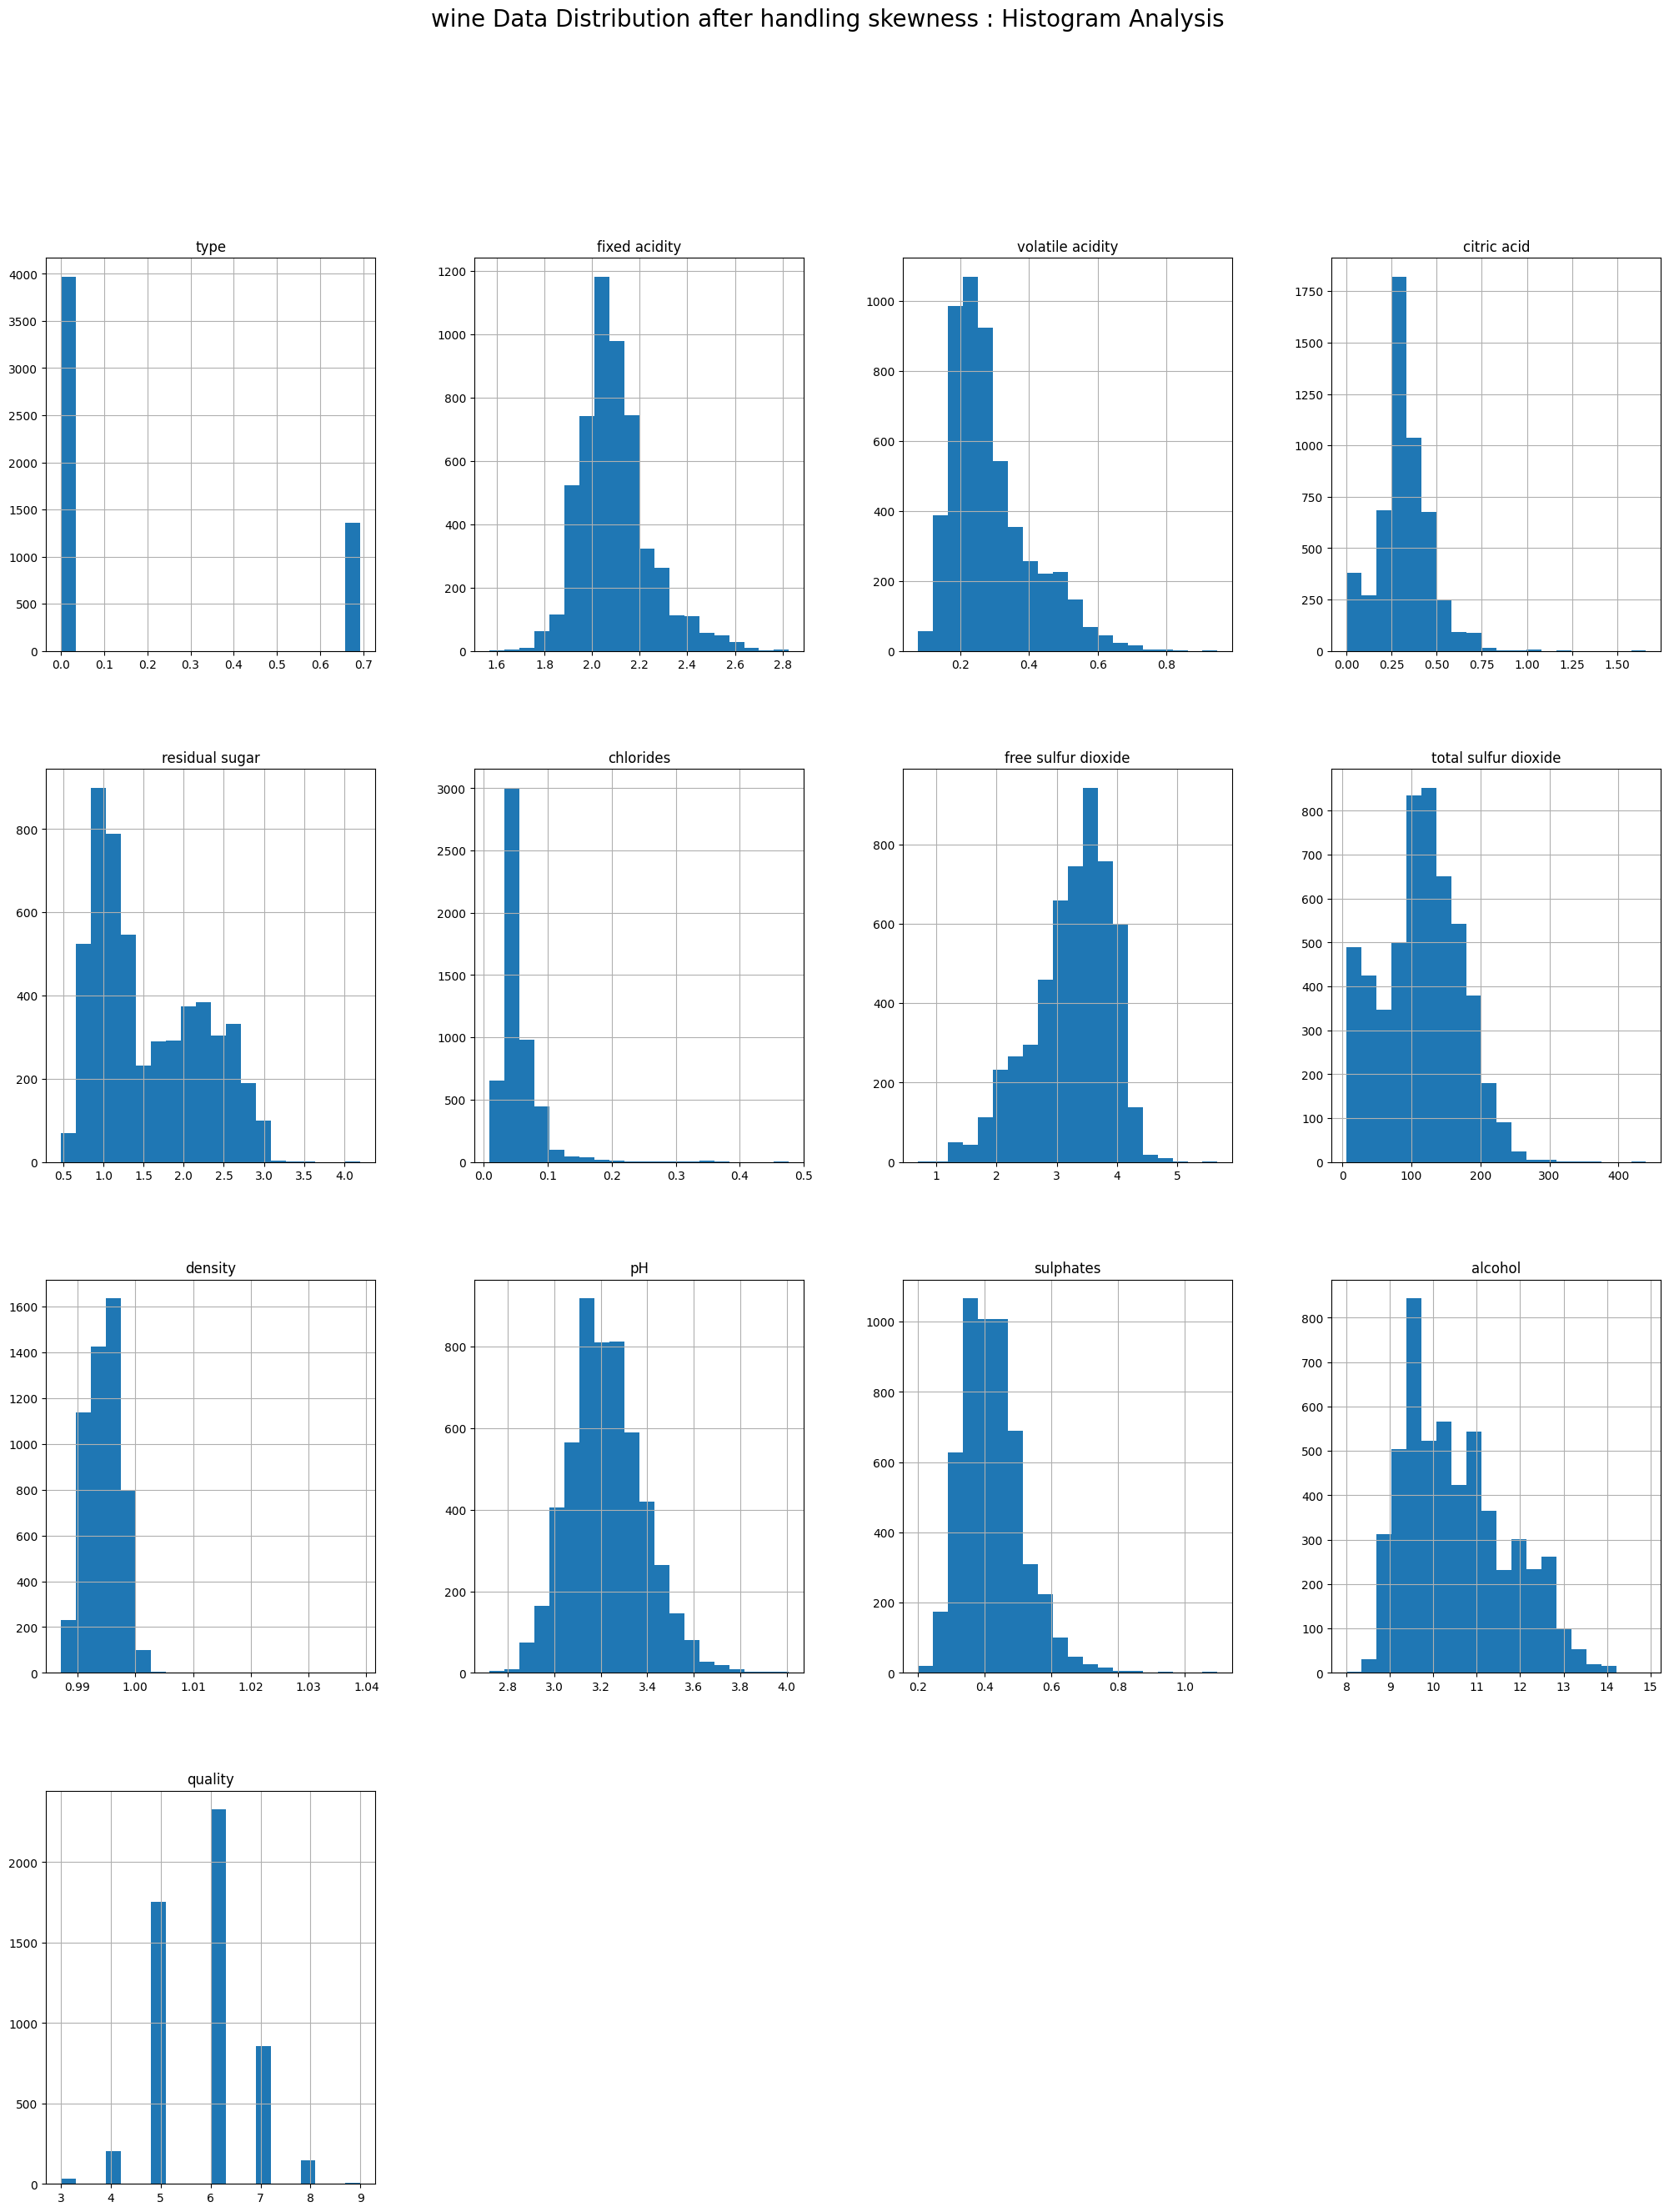

In [69]:
data.hist(bins=20,figsize=(25,30))
plt.suptitle('wine Data Distribution after handling skewness : Histogram Analysis',fontsize=20)
plt.show()

## outlier

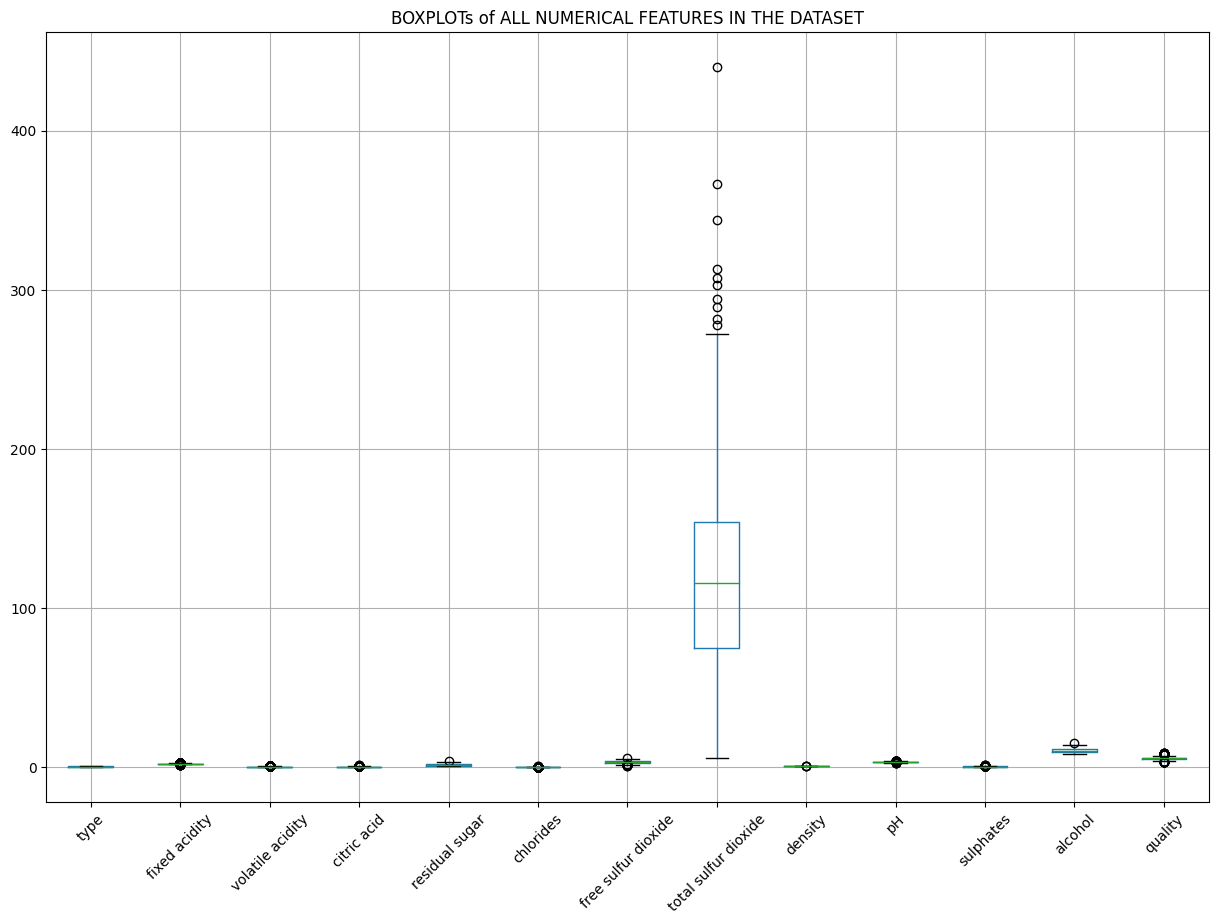

In [70]:
plt.figure(figsize=(15,10))
data.select_dtypes(include=['float64','int64']).boxplot(rot=45)
plt.title("BOXPLOTs of ALL NUMERICAL FEATURES IN THE DATASET")
plt.show()

In [71]:
# Select only numeric columns for outlier detection
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Define function to remove outliers using IQR
def remove_outliers_iqr(data, columns):
    cleaned_data = data.copy()
    for col in columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter data within the bounds
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

# Apply IQR method to remove outliers
df_cleaned = remove_outliers_iqr(data, numeric_cols)

# Compare original and cleaned dataset sizes
data.shape, df_cleaned.shape


((5329, 13), (3905, 13))

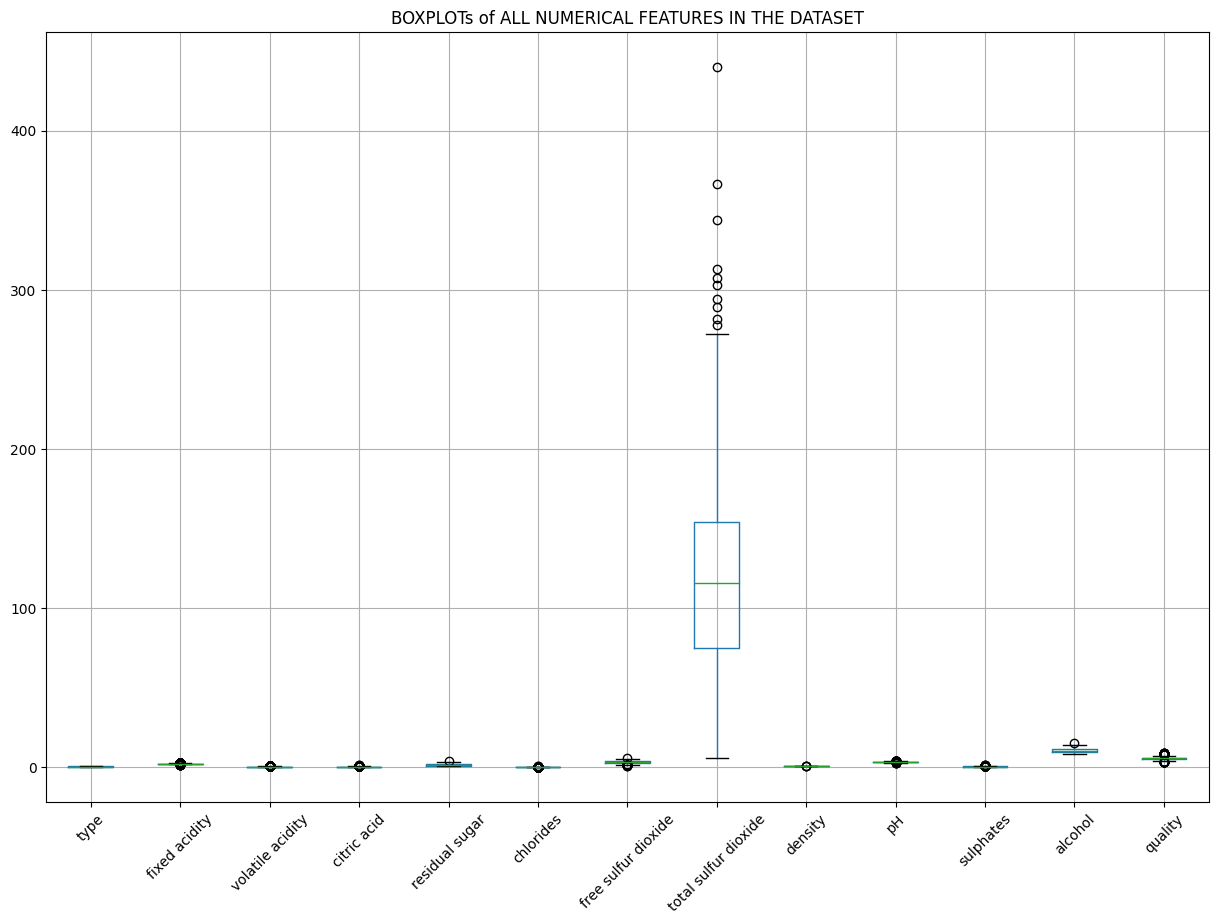

In [72]:
plt.figure(figsize=(15,10))
data.select_dtypes(include=['float64','int64']).boxplot(rot=45)
plt.title("BOXPLOTs of ALL NUMERICAL FEATURES IN THE DATASET")
plt.show()

## Non relvent columns

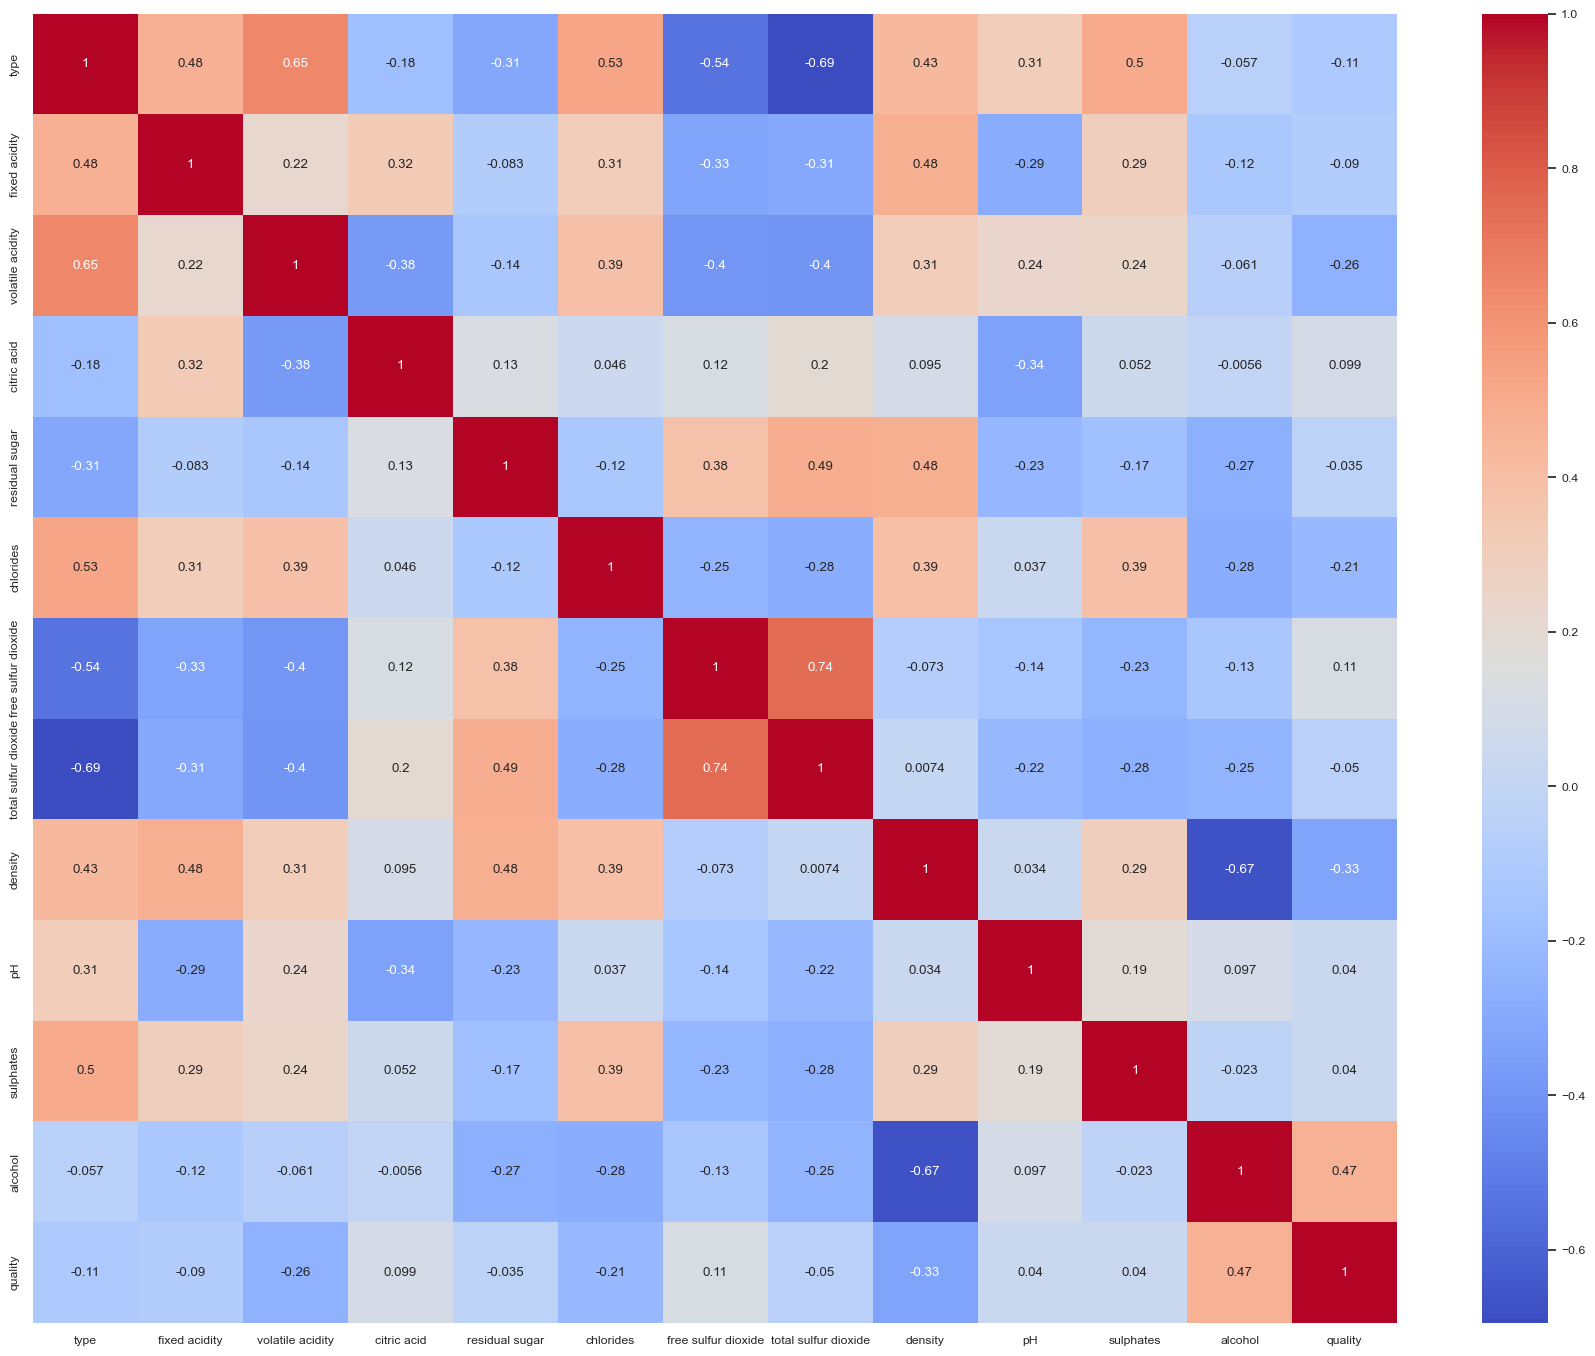

In [73]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

In [74]:
data_data_corr=data.corr()
data_data_corr.style.background_gradient(cmap="viridis")

Inference on Irrelevant Features (Using Correlation Matrix)

The correlation matrix (data_data_corr) helps identify irrelevant features by analyzing the correlation between each pair of variables. Here’s how to interpret it:

1. Features with Near-Zero Correlation with Target Variable (Quality)
If a feature has a correlation close to 0 with quality, it means it has little to no impact on wine quality.

These features can be considered irrelevant for predicting quality.

Example:
If density has a correlation of 0.01 with quality, it means density does not significantly influence wine quality.

2. Highly Correlated Independent Features (Multicollinearity)
If two independent features (e.g., fixed acidity & citric acid) have a correlation > 0.8, one of them can be removed to avoid redundancy.

* Multicollinearity can lead to overfitting in predictive models.
Example:
If total sulfur dioxide and free sulfur dioxide have a correlation of 0.85, keeping both might be redundant.

3. Features with Strong Negative Correlation
Some features might have a strong negative correlation with quality, meaning as the feature increases, quality decreases.

 These features can still be relevant but might indicate an inverse relationship.

 Example:
  If volatile acidity has -0.40 correlation with quality, it suggests higher acidity negatively affects quality.



In [75]:
correlation_matrix=data.corr()
#set the correlation threhold
threshold=0.5
# Find pairs of features with high correlation
highly_correlation_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    # check if the absolute correlation exceeds the thrshold
    if abs(correlation_matrix.iloc[i,j]) > threshold :
      highly_correlation_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
# print all pairs of highly correlated features
print(highly_correlation_pairs)


[('volatile acidity', 'type'), ('chlorides', 'type'), ('free sulfur dioxide', 'type'), ('total sulfur dioxide', 'type'), ('total sulfur dioxide', 'free sulfur dioxide'), ('alcohol', 'density')]


In [76]:
# step1 : calculate the correlation of each feature with the target
corr_with_target=data.corr()["quality"].sort_values(ascending=False)

# step2: set the threshold for low correlation (-0.1 to 0.1)
low_corr_features= corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

# step 3: print the list of features with low correlation
print("Features with correlation batween -0.05 and 0.05:")
low_corr_features

Features with correlation batween -0.05 and 0.05:


pH                0.039953
sulphates         0.039933
residual sugar   -0.034948
Name: quality, dtype: float64

In [77]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# model building

##  Regression model

In [78]:
x1=data.drop('quality',axis=1)
y1=data[['quality']]


In [79]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)
print("shape of Training Features:",x1_train.shape)
print("shape of Testing Features:",x1_test.shape)
print("shape of Training Target :",y1_train.shape)
print("shape of Testing Target :",y1_test.shape)

shape of Training Features: (4263, 12)
shape of Testing Features: (1066, 12)
shape of Training Target : (4263, 1)
shape of Testing Target : (1066, 1)


In [80]:
models={
    "Linear_Regression":LinearRegression(),
    "RandomForest_Regressor":RandomForestRegressor(),
    "GradientBoosting_Regressor":GradientBoostingRegressor(),
    "DecisionTree_Regressor":DecisionTreeRegressor(),
    "SVM":SVR(),
    #"MLP_regressor": MLPRegressor(max_iter=500),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    # 'catBoostRegressor':catBoostRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [81]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [82]:
# dictionary to store results
results={'model':[],'MSE':[],'MAE':[],'R2':[]}
# loop through the models train them and calculate the metrics
for model_name,model in models.items():
  # Train the model
  model.fit(x1_train,y1_train)
  # make prediction
  y1_pred=model.predict(x1_test)

  mse=mean_squared_error(y1_test,y1_pred)
  mae=mean_absolute_error(y1_test,y1_pred)
  r2=r2_score(y1_test,y1_pred)

  # store results in the dictionary
  results['model'].append(model_name)
  results['MSE'].append(mse)
  results['MAE'].append(mae)
  results['R2'].append(r2)

  #  converts results to a DataFrame
results_df=pd.DataFrame(results)
  # Display the results
results_df

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1509
[LightGBM] [Info] Number of data points in the train set: 4263, number of used features: 12
[LightGBM] [Info] Start training from score 5.803425


model       MSE       MAE        R2
0           Linear_Regression  0.536614  0.561559  0.309841
1      RandomForest_Regressor  0.491052  0.536520  0.368439
2  GradientBoosting_Regressor  0.512465  0.556098  0.340899
3      DecisionTree_Regressor  0.986867  0.677298 -0.269247
4                         SVM  0.700579  0.637787  0.098958
5           AdaBoostRegressor  0.566095  0.582974  0.271923
6            BaggingRegressor  0.548049  0.564165  0.295133
7               LGBMRegressor  0.506696  0.544083  0.348319
8                XGBRegressor  0.538478  0.563254  0.307442

In [83]:
x1_train.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [84]:
data["pH"].value_counts

<bound method IndexOpsMixin.value_counts of 0       3.00
1       3.30
2       3.26
3       3.19
6       3.18
        ... 
6491    3.42
6492    3.45
6493    3.52
6495    3.57
6496    3.39
Name: pH, Length: 5329, dtype: float64>

In [85]:
x1_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4263 entries, 3412 to 1012
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4263 non-null   float64
 1   fixed acidity         4263 non-null   float64
 2   volatile acidity      4263 non-null   float64
 3   citric acid           4263 non-null   float64
 4   residual sugar        4263 non-null   float64
 5   chlorides             4263 non-null   float64
 6   free sulfur dioxide   4263 non-null   float64
 7   total sulfur dioxide  4263 non-null   float64
 8   density               4263 non-null   float64
 9   pH                    4263 non-null   float64
 10  sulphates             4263 non-null   float64
 11  alcohol               4263 non-null   float64
dtypes: float64(12)
memory usage: 433.0 KB


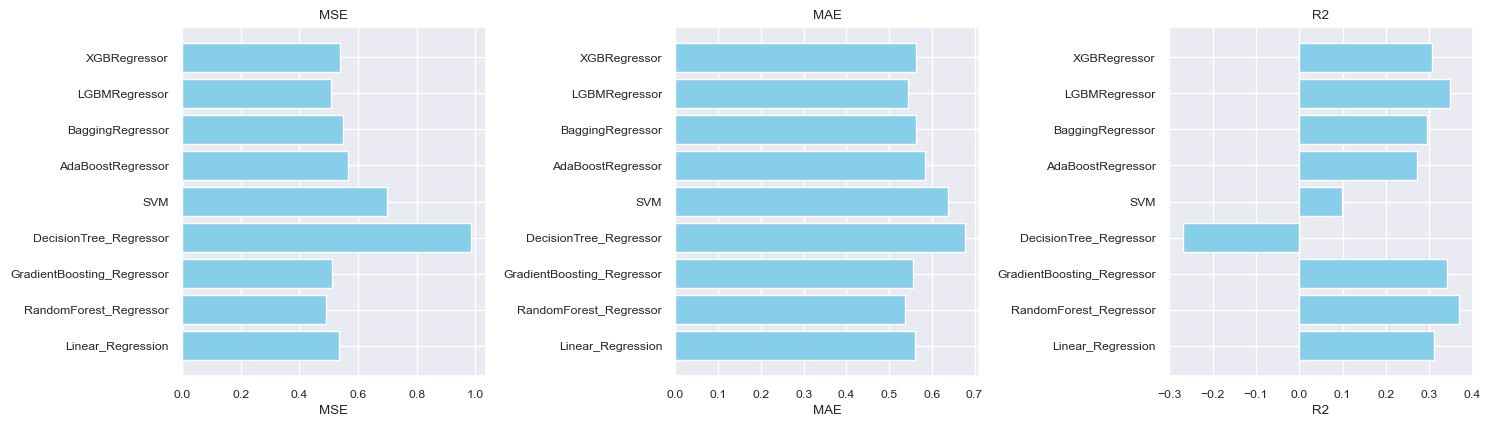

In [86]:
# ploting each metric
metrics=['MSE','MAE','R2']

plt.figure(figsize=(15,8))

for i, metric in enumerate(metrics):
  plt.subplot(2,3,i+1)
  plt.barh(results_df['model'],results_df[metric],color="skyblue")
  plt.title(metric)
  #plt.xlim(0,1)
  plt.xlabel(metric)
plt.tight_layout()
plt.show()

#### Regression On scaled Data

In [87]:
x1s=data_scaled_df.drop('quality', axis=1)
y1s=data_scaled_df[['quality']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)
# dictionary to store results
results={'model':[],'MSE':[],'MAE':[],'R2':[]}
# loop through the models train them and calculate the metrics
for model_name,model in models.items():
  # Train the model
  model.fit(x1s_train,y1s_train)
  # make prediction
  y1s_pred=model.predict(x1s_test)

  mse1=mean_squared_error(y1s_test,y1s_pred)
  mae1=mean_absolute_error(y1s_test,y1s_pred)
  r21=r2_score(y1s_test,y1s_pred)

  # store results in the dictionary
  results['model'].append(model_name)
  results['MSE'].append(mse1)
  results['MAE'].append(mae1)
  results['R2'].append(r21)

  #  converts results to a DataFrame
  results_df1=pd.DataFrame(results)
  # Display the results
  # results_df1
# sort by Accuracy
results_df1=results_df1.sort_values(by="MSE",ascending=True)
# display the sorted DataFrame with background gradient
results_df1.style.background_gradient('Blues')

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1514
[LightGBM] [Info] Number of data points in the train set: 4263, number of used features: 12
[LightGBM] [Info] Start training from score 5.803425


In [90]:
x1s_train.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
# save the regression model
import pickle
d_model =SVR()
d_model.fit(x1s_train,y1s_train.values.ravel())
with open ('Regression_model.pkl','wb') as file:
    pickle.dump(d_model, file)

# pickle file

In [88]:
# save the regression model
import pickle
d_model =SVR()
d_model.fit(x1s_train,y1s_train.values.ravel())
with open ('Regression_model.pkl','wb') as file:
    pickle.dump(d_model, file)

In [89]:
import pickle
with open ('scaler_model.pkl','wb') as file:
    pickle.dump(scaler, file)